In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

# Load the training data
train_data = pd.read_csv("train.csv")

# Split the data into input features and target variable
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# Create a linear regression object
lr = LinearRegression()

# Fit the model using the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
test_data = pd.read_csv("test.csv")
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
y_pred = lr.predict(X_test)

# Compute the performance using validation approach
rse_val = np.sqrt(mean_squared_error(y_test, y_pred))
r2_val = r2_score(y_test, y_pred)

# Compute the performance using cross-validation approach
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Define the number of folds
rse_cv = np.sqrt(-cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean())
r2_cv = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2').mean()

# Print the results
print("Validation approach:")
print("RSE: {:.4f}".format(rse_val))
print("R2: {:.4f}".format(r2_val))
print("\nCross-validation approach:")
print("RSE: {:.4f}".format(rse_cv))
print("R2: {:.4f}".format(r2_cv))


Validation approach:
RSE: 9.5416
R2: 0.5953

Cross-validation approach:
RSE: 10.4120
R2: 0.6162


Best alpha value: 10000.00000
Test RSE: 9.5439
Test R2: 0.5951


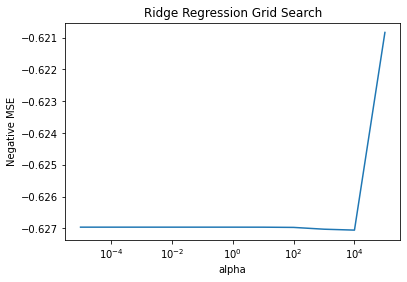

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv("train.csv")

# Split the data into input features and target variable
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# Create a Ridge regression object
ridge = Ridge()

# Define the range of alpha values to search over
alphas = np.logspace(-5, 5, 11)

# Define the parameter grid for grid search
param_grid = {'alpha': alphas}

# Perform grid search using cross-validation
cv = GridSearchCV(ridge, param_grid, cv=5)
cv.fit(X_train, y_train)

# Print the best alpha value
best_alpha = cv.best_params_['alpha']
print("Best alpha value: {:.5f}".format(best_alpha))

# Train a final model on the entire training data using the best alpha value
final_ridge = Ridge(alpha=best_alpha)
final_ridge.fit(X_train, y_train)

# Make predictions on the test data using the final model
test_data = pd.read_csv("test.csv")
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
y_pred = final_ridge.predict(X_test)

# Compute the performance of the final model on the test data
rse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Test RSE: {:.4f}".format(rse))
print("Test R2: {:.4f}".format(r2))

# Plot the performance of the models explored during the alpha hyperparameter tuning phase
cv_results = cv.cv_results_
plt.semilogx(alphas, -cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative MSE')
plt.title('Ridge Regression Grid Search')
plt.show()


Best alpha parameter value:  0.09111627561154886


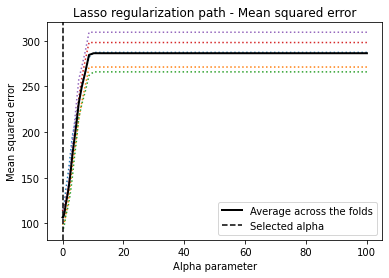

Lasso Regression - Test RSE: 9.594899104409219
Lasso Regression - Test R2 score: 0.5907755504388721

Linear Regression - Test RSE: 9.541579629003255
Linear Regression - Test R2 score: 0.5953110867026099

Ridge Regression - Test RSE: 9.550508294681698
Ridge Regression - Test R2 score: 0.5945533457909424

Lasso Regression - Test RSE: 9.594899104409219
Lasso Regression - Test R2 score: 0.5907755504388721


In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Extract features and target variable
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Lasso regression model with CV-based hyperparameter tuning
alphas = np.logspace(-5, 2, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter value
print("Best alpha parameter value: ", lasso_cv.alpha_)

# Plot the performance of the Lasso models explored during hyperparameter tuning
plt.figure()
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_, ':')
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(lasso_cv.alpha_, linestyle='--', color='k', label='Selected alpha')
plt.legend()
plt.xlabel('Alpha parameter')
plt.ylabel('Mean squared error')
plt.title('Lasso regularization path - Mean squared error')
plt.show()

# Train the final Lasso regression model with the best alpha value
lasso_reg = LassoCV(alphas=lasso_cv.alphas_, cv=5)
lasso_reg.fit(X_train, y_train)

# Evaluate the performance of the Lasso model on the test data
y_pred = lasso_reg.predict(X_test)
rse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Lasso Regression - Test RSE:", rse)
print("Lasso Regression - Test R2 score:", r2)

# Compare the performance of the Lasso model with that of the Ridge and simple linear regression models
simple_reg = LinearRegression()
simple_reg.fit(X_train, y_train)
simple_y_pred = simple_reg.predict(X_test)
simple_rse = np.sqrt(mean_squared_error(y_test, simple_y_pred))
simple_r2 = r2_score(y_test, simple_y_pred)

ridge_reg = RidgeCV(alphas=alphas, cv=5)
ridge_reg.fit(X_train, y_train)
ridge_y_pred = ridge_reg.predict(X_test)
ridge_rse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("\nLinear Regression - Test RSE:", simple_rse)
print("Linear Regression - Test R2 score:", simple_r2)

print("\nRidge Regression - Test RSE:", ridge_rse)
print("Ridge Regression - Test R2 score:", ridge_r2)

print("\nLasso Regression - Test RSE:", rse)
print("Lasso Regression - Test R2 score:", r2)


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def predictCompressiveStrength(Xtest, data_dir):
    # Load the training data
    train_data = pd.read_csv(data_dir + "/train.csv")

    # Extract the features and target variable from the training data
    Xtrain = train_data.iloc[:, :-1]
    ytrain = train_data.iloc[:, -1]

    # Standardize the data
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    # Train a Gradient Boosting Regressor with hyperparameter tuning
    model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, min_samples_split=5, random_state=42)
    model.fit(Xtrain, ytrain)

    # Make predictions on the test data
    ytest = model.predict(Xtest)

    return ytest

